In [1]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
import pandas as pd

In [44]:
year, grand_prix, session = 2024, 'Mexico','Q'

quali = ff1.get_session(year, grand_prix, session)
quali.load() 

core           INFO 	Loading data for Mexico City Grand Prix - Qualifying [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            I

In [45]:
driver_1, driver_2 = '11', '1'

In [ ]:
laps_driver_1 = quali.laps.pick_driver(driver_1)
laps_driver_2 = quali.laps.pick_driver(driver_2)

fastest_driver_1 = laps_driver_1.pick_fastest()
fastest_driver_2 = laps_driver_2.pick_fastest()

telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()

c:\Users\jessm\OneDrive\Desktop\DriverPredictRFM\venv\Lib\site-packages\fastf1\core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


In [ ]:
team_driver_1 = fastest_driver_1['Team']
team_driver_2 = fastest_driver_2['Team']

In [ ]:
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)

c:\Users\jessm\OneDrive\Desktop\DriverPredictRFM\venv\Lib\site-packages\fastf1\utils.py:89: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"


c:\Users\jessm\OneDrive\Desktop\DriverPredictRFM\venv\Lib\site-packages\fastf1\plotting\_plotting.py:249: FutureWarning: INCOMPATIBLE with 2025 season!The function `team_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_team_color` instead.
  warnings.warn("INCOMPATIBLE with 2025 season!The function `team_color` "
_plotting    WARNING 	Correcting invalid user input 'vcarb' to 'visa rb'.


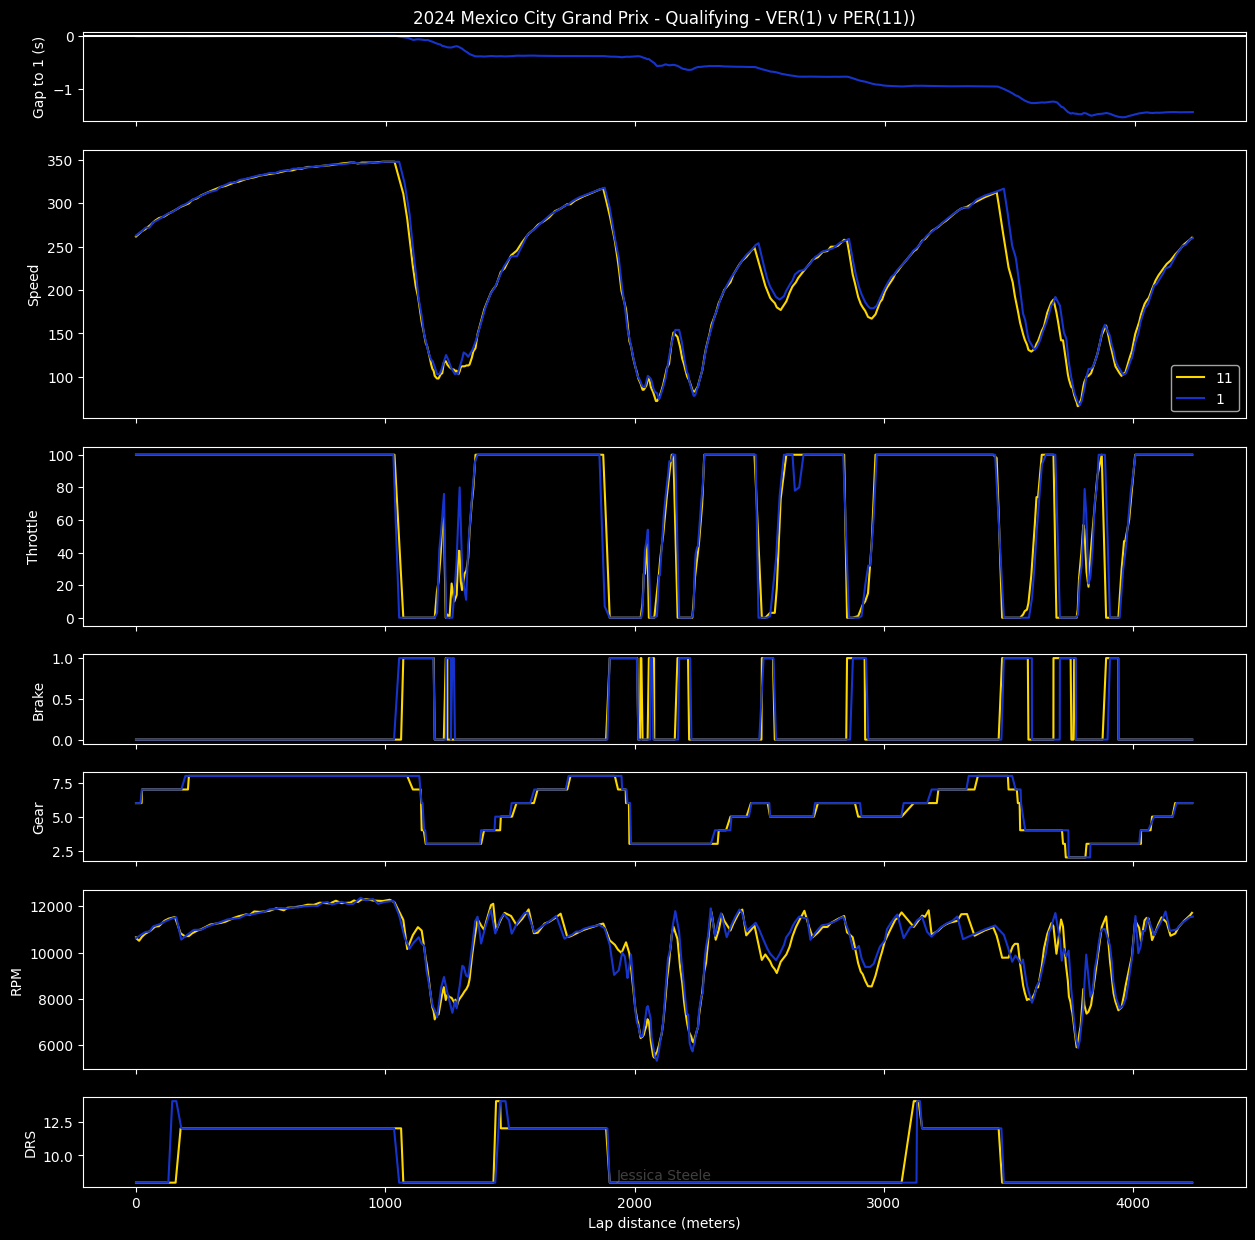

In [50]:
color_driver_1 = ff1.plotting.team_color('Red Bull')
color_driver_2 = ff1.plotting.team_color('VCARB')
plot_size = [15, 15]
plot_title = f"{quali.event.year} {quali.event.EventName} - {quali.name} - VER(1) v PER(11))"
plot_ratios = [1, 3, 2, 1, 1, 2, 1]
plot_filename = plot_title.replace(" ", "") + ".png"
plt.style.use('dark_background') 
plt.rcParams['figure.figsize'] = plot_size
fig, ax = plt.subplots(7, gridspec_kw={'height_ratios': plot_ratios})
ax[0].title.set_text(plot_title)
ax[0].plot(ref_tel['Distance'], delta_time, color=color_driver_2)
ax[0].axhline(0)
ax[0].set(ylabel=f"Gap to {driver_2} (s)")
ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver_1, color=color_driver_1)
ax[1].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=driver_2, color=color_driver_2)
ax[1].set(ylabel='Speed')
ax[1].legend(loc="lower right")
ax[2].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Throttle'], label=driver_1, color=color_driver_1)
ax[2].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Throttle'], label=driver_2, color=color_driver_2)
ax[2].set(ylabel='Throttle')
ax[3].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Brake'], label=driver_1, color=color_driver_1)
ax[3].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Brake'], label=driver_2, color=color_driver_2)
ax[3].set(ylabel='Brake')
ax[4].plot(telemetry_driver_1['Distance'], telemetry_driver_1['nGear'], label=driver_1, color=color_driver_1)
ax[4].plot(telemetry_driver_2['Distance'], telemetry_driver_2['nGear'], label=driver_2, color=color_driver_2)
ax[4].set(ylabel='Gear')
ax[5].plot(telemetry_driver_1['Distance'], telemetry_driver_1['RPM'], label=driver_1, color=color_driver_1)
ax[5].plot(telemetry_driver_2['Distance'], telemetry_driver_2['RPM'], label=driver_2, color=color_driver_2)
ax[5].set(ylabel='RPM')
ax[6].plot(telemetry_driver_1['Distance'], telemetry_driver_1['DRS'], label=driver_1, color=color_driver_1)
ax[6].plot(telemetry_driver_2['Distance'], telemetry_driver_2['DRS'], label=driver_2, color=color_driver_2)
ax[6].set(ylabel='DRS')
ax[6].set(xlabel='Lap distance (meters)')

for a in ax.flat:
    a.label_outer()
   
plt.text(0.5, 0.05, 'Jessica Steele', fontsize=10, color='gray', alpha=0.5,
        ha='center', va='bottom', transform=plt.gca().transAxes, rotation=0)
    

plt.show()